

# Project 2: Investigating TMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project we will be exploring and analyzing a large movie datasets from "The Movie Database" TMDB. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and many other Informations that will help explore variaty of factors as well as answer our research question that are mentioned bellow.

 

## Questions 

<ul>
    
<li>Q1 - Does the vote count have any effect on receiving high rating? </li>
<li>Q2 - When did the movie industry receiving the highest revenue? </li>
<li>Q2 - what is the effect of genre and budget on the ratings? </li>
<li>Q3 - Is Movies production increasing or decreasing over the years? </li>
<li>Q4 - Does high ratings and large budget increase profit? </li>
<li>Q5 - What genres has the hight number of movies? </li>
    </ul>


In [53]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib  inline
%autosave 30


Autosaving every 30 seconds


<a id='wrangling'></a>
## Data Wrangling
In this section we will explore the selected dataset to take an overview of the data before working with it. Also to look for any proplems or incorrect parts. Then, clean the dataset to make the anaysis process easier and more consistent.


### General Properties

In [54]:
# Load dataset

df=pd.read_csv('tmdb-movies.csv')

# Explore the dataset

df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52


In [55]:
df.shape

(10866, 21)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

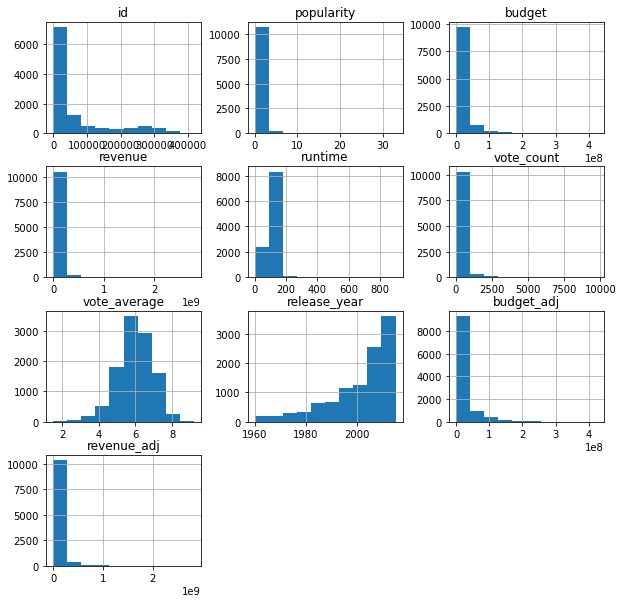

In [57]:
df.hist(figsize=(10,10))

In [58]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [59]:
#check for null values

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [60]:
# check for duplicates 

df.duplicated().sum()

1

In [61]:
# check unique values to make sure there is no redundancy 

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [62]:
#cont. checking irregular output from previous line

df['budget'].value_counts().head()


0           5696
20000000     190
15000000     183
25000000     178
10000000     176
Name: budget, dtype: int64

In [63]:
df['revenue'].value_counts().head()


0           6016
12000000      10
10000000       8
11000000       7
6000000        6
Name: revenue, dtype: int64

### Data Cleaning 

The dataset seems clean to some extent, most of null values exist in columns that I wouldn't use in this Analysis and there is only one duplicate. on the other hand, the budget and revenue columns displayed some irregular patterns, using df.nunique() it showed that some columns have less than half unique values and by using value_counts() for both budget and revenue it shows that the column are filled with 0 value, including the other 2 column budget_adj and revenue_adj.

 <br/>
 Therefore, after exploring the general properties of the dataset I've decided to do the following steps bellow, that will help me organize my dataset and answer my research questions more easily:
 
<ol>
    <li>Drop Unused Columns
<br/> Delete the columns that are not usefull to me and will not be used to answer the Research questions like (homepage, tagline, overview, cast, release_date, imdb_id,cast, production_companies)</li>
    <li>Drop Null Values
    <br/>Delete rows that have any missing values
    </li>
      <li>Drop Duplicate Rows
    <br/>Delete all duplicates rows, which is only one in this case.
    </li>
      <li>Fix zero value in budget and revenue by using the mean
    <br/>To do that we will change the zero values to null, then replace the null with the mean, so the mean caculation can be more accurate, then replace all null values with the mean of it's column.
    </li>
     <li>split columns with multiple values
    <br/> The Genere column which is an important column to our project contain multiple values seperated by "|"
         we will seperate each genere word into it's own df and column then joining it to our original data frame for analysis and finally delete the old genere column. 
    </li>
      <li>Fix format 
    <br/> The numbers appears to be in a Scientific format that displays a number in exponential notation, we will fix it using pandas options.
    </li>

  
    
</ol>

### Drop Unused Columns


In [64]:
# drop unuseful columns 

df=df.drop(['homepage','tagline','overview','keywords','cast','release_date','imdb_id','cast','production_companies'],axis=1)


In [65]:

df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.50,2015,137999939.28,1392445892.52


### Remove Null Values


In [66]:
# check null values

df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [67]:
# drop rows with any null values

df.dropna(inplace=True)

In [68]:
# check 

df.isnull().sum().any()

False

### Remove Duplicate Rows

In [69]:
#check duplicate values

df.duplicated().sum()

1

In [70]:
# drop the duplicate row

df.drop_duplicates(inplace=True)

In [71]:
# check

df.duplicated().sum().any()

False

### Fix zero values in Budget and Revenue 

In [72]:
# First: change the zero values to null

df['budget'] = df['budget'].replace({0: np.nan})
df['revenue'] = df['revenue'].replace({0: np.nan})
df['budget_adj'] = df['budget_adj'].replace({0: np.nan})
df['revenue_adj'] = df['revenue_adj'].replace({0: np.nan})
df['runtime'] = df['runtime'].replace({0: np.nan})


In [73]:
df.isnull().sum()

id                   0
popularity           0
budget            5636
revenue           5952
original_title       0
director             0
runtime             28
genres               0
vote_count           0
vote_average         0
release_year         0
budget_adj        5636
revenue_adj       5952
dtype: int64

In [74]:
# Now replace all the null values in each column with the column's mean value

df['budget'].fillna(value=df['budget'].mean(), inplace=True)
df['revenue'].fillna(value=df['revenue'].mean(), inplace=True)
df['budget_adj'].fillna(value=df['budget_adj'].mean(), inplace=True)
df['revenue_adj'].fillna(value=df['revenue_adj'].mean(), inplace=True)
df['runtime'].fillna(value=df['runtime'].mean(), inplace=True)


In [75]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [76]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00
mean,65576.18,0.65,30766902.22,89254997.09,102.46,218.60,5.97,2001.29,36922388.76,115122331.57
std,91756.08,1.00,26906491.37,108594771.52,30.34,577.17,0.93,12.82,29018363.24,133234060.66
min,5.00,0.00,1.00,2.00,2.00,10.00,1.50,1960.00,0.92,2.37
25%,10570.50,0.21,19000000.00,40490829.00,90.00,17.00,5.40,1995.00,24326436.74,57843709.49
50%,20460.00,0.39,30766902.22,89254997.09,99.00,39.00,6.00,2006.00,36922388.76,115122331.57
75%,74725.25,0.72,30766902.22,89254997.09,111.25,147.00,6.60,2011.00,36922388.76,115122331.57
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


### Split columns with multiple values

In [77]:
#ref:https://stackoverflow.com/questions/48958282/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python

# split the values in genere column seperated by (|) into multiple columns using str.split() 
# using Lambda function to generate multiple columns 

df_g=df['genres'].str.split('|', expand=True).rename(columns = lambda x: "genre_"+str(x+1))

df_g.head()


,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [78]:
# join the Individual generes columns into the main dataframe

df = df.join([df_g])

In [79]:
# drop old unsplited genres column 

df=df.drop('genres', axis=1)

In [80]:
df.head()
df.isnull().sum()
#delete genre_4 and genre_5 because most of their values are null and they are not important

df=df.drop(['genre_5','genre_4'], axis=1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10800 non-null  int64  
 1   popularity      10800 non-null  float64
 2   budget          10800 non-null  float64
 3   revenue         10800 non-null  float64
 4   original_title  10800 non-null  object 
 5   director        10800 non-null  object 
 6   runtime         10800 non-null  float64
 7   vote_count      10800 non-null  int64  
 8   vote_average    10800 non-null  float64
 9   release_year    10800 non-null  int64  
 10  budget_adj      10800 non-null  float64
 11  revenue_adj     10800 non-null  float64
 12  genre_1         10800 non-null  object 
 13  genre_2         8489 non-null   object 
 14  genre_3         5062 non-null   object 
dtypes: float64(7), int64(3), object(5)
memory usage: 1.6+ MB


### Fix format 

In [82]:
# ref: https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential

# the numbers looks weird so we're going to remove the scientific format

pd.options.display.float_format = '{:.2f}'.format


In [83]:
# check
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00,10800.00
mean,65576.18,0.65,30766902.22,89254997.09,102.46,218.60,5.97,2001.29,36922388.76,115122331.57
std,91756.08,1.00,26906491.37,108594771.52,30.34,577.17,0.93,12.82,29018363.24,133234060.66
min,5.00,0.00,1.00,2.00,2.00,10.00,1.50,1960.00,0.92,2.37
25%,10570.50,0.21,19000000.00,40490829.00,90.00,17.00,5.40,1995.00,24326436.74,57843709.49
50%,20460.00,0.39,30766902.22,89254997.09,99.00,39.00,6.00,2006.00,36922388.76,115122331.57
75%,74725.25,0.72,30766902.22,89254997.09,111.25,147.00,6.60,2011.00,36922388.76,115122331.57
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


<a id='eda'></a>
## Exploratory Data Analysis



### Q1: Does the vote count have any effect on receiving high rating?

In [84]:
# First I want to cut the vote into groups to show high to low vote levels more clearlly
# make df for votes
df_r=df.loc[:, 'vote_average': 'vote_average' ]
print(df_r.describe())


       vote_average
count      10800.00
mean           5.97
std            0.93
min            1.50
25%            5.40
50%            6.00
75%            6.60
max            9.20


In [85]:
#assign levels for votes high, medium, low ratings 
#divide them based on the 5 vales from df.describe() above

bin_edges=[1.50,5.40,6.00,6.60,9.20]
bin_names=['Low','Med_low','Med','High']

#create column 
df_r['rate_level']=pd.cut(df_r['vote_average'], bin_edges, labels=bin_names)

df_r.head()

,vote_average,rate_level
0,6.50,Med
1,7.10,High
2,6.30,Med
3,7.50,High
4,7.30,High


In [86]:
# now delete vote_average column 
df_r=df_r.drop('vote_average', axis=1)

df_r.head()

,rate_level
0,Med
1,High
2,Med
3,High
4,High


In [87]:
# join df_r to the original dataframe and keep old vote_average 

df = df.join([df_r])

In [88]:
df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,rate_level
0,135397,32.99,150000000.00,1513528810.00,Jurassic World,Colin Trevorrow,124.00,5562,6.50,2015,137999939.28,1392445892.52,Action,Adventure,Science Fiction,Med


Text(0, 0.5, 'Vote Count')

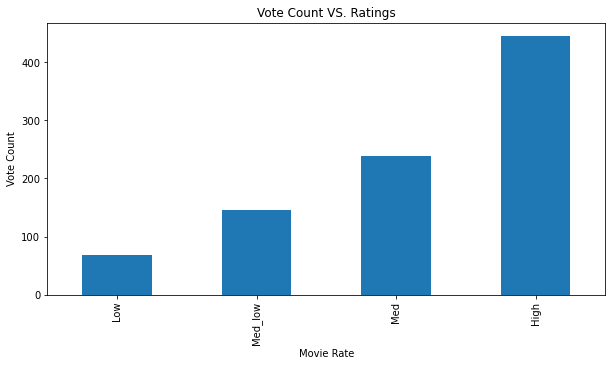

In [89]:
#plot a bar chart to show the correlation between rate level and vote count
df.groupby('rate_level').mean().vote_count.plot(kind='bar', title='Vote Count VS. Ratings',figsize=(10,5));

#x axis label
plt.xlabel('Movie Rate')
#y axis label
plt.ylabel('Vote Count')


**A1:** As it shown in the above graph, there's indeed a correlation between the vote count and the ratings of the movies. high number of votes in movies tend to receive high ratings than low vote count. the more popular the movie the more liklly to be watched and be rated.

### Q2: When did the movie industry received the highest revenue?

Text(0, 0.5, 'profit')

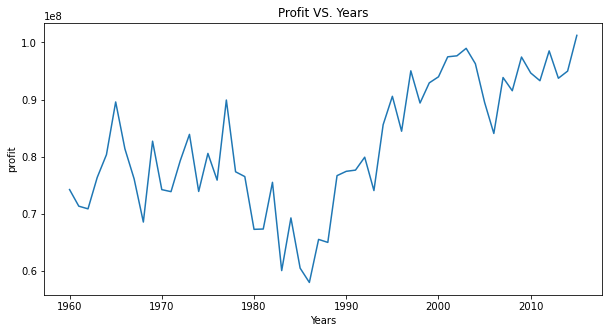

In [90]:
#How profitable is the movie industry 
#plot the relationship between years and revenue
df.groupby('release_year')['revenue'].mean().plot(kind='line', title='Profit VS. Years', figsize=(10,5));

#x axis label
plt.xlabel('Years')
#y axis label
plt.ylabel('profit')



**A2:** The revenue of movies is increasing over the years which is Probably because of the devolopment of movie production in latest years. However, the graph is showing a large decline between the 80s and the 90s.
To answer the Research question, the highest profit is achieved by the year 2010 and after.


### Q3: Is Movie production increasing or decreasing over the years?

Text(0, 0.5, 'Year')

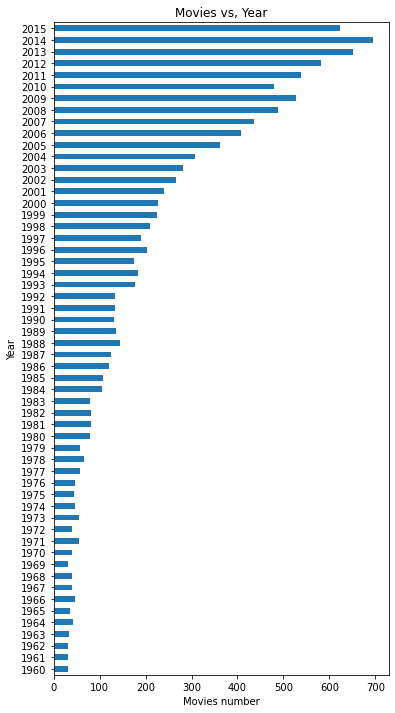

In [91]:
#find number of movies each year by counting the release_year
Yearly_movies = df['release_year'].value_counts().sort_index()

#plot number of movies and 
Yearly_movies.plot(kind='barh',title='Movies vs, Year', figsize=(6,12))

#x axis label
plt.xlabel('Movies number')
#y axis label
plt.ylabel('Year')

**A3:** As it shown in the bar graph above, movies production is definitely increasing over the years. the difference between movies made in the 60s and now is huge.  In the year 2015 there is a decline in the number of movied from the year before 2014. the year 2014 have the highest number of movies in this particular dataset.

### Q4: Does high ratings and large budget increase profit?

<ipython-input-92-91cae49fead0>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('rate_level')['budget','revenue'].mean().plot(kind='bar',title='Ratings Vs. Cost',figsize=(12,10));


Text(0, 0.5, 'Budget, Revenue')

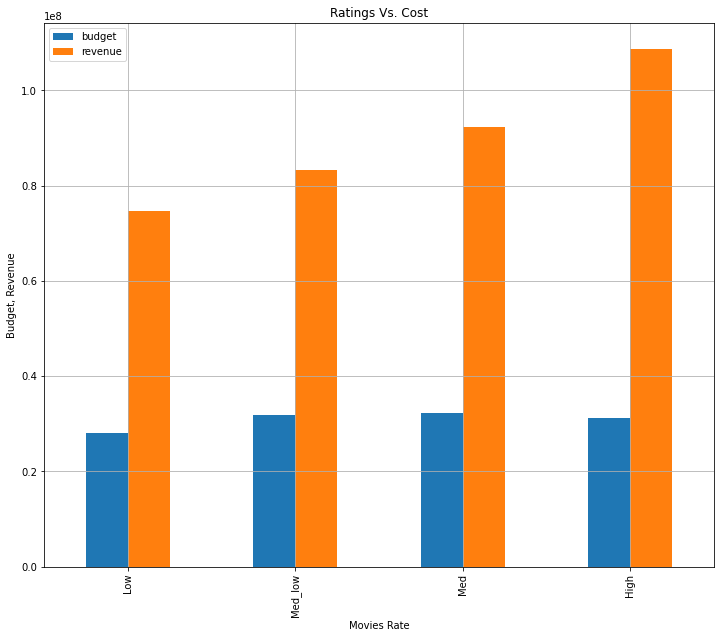

In [92]:
#ref:https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

#see the relationship of rating and budget with revenue
# plot using bar chart 
df.groupby('rate_level')['budget','revenue'].mean().plot(kind='bar',title='Ratings Vs. Cost',figsize=(12,10));

#add a grid
plt.grid(True)
#x axis label
plt.xlabel('Movies Rate')
#y axis label
plt.ylabel('Budget, Revenue')

The Bar chart above shows the relationship of rate and budget in achieving high revenues, the budget doesn't play a major role in receiving high ratings because budget of each rate level is similar. however, it's save to say that the higher the budget and profit the higher the rating is. It can be a proportional Relationship.

### Q5: What genres has the highest number of movies?

In [93]:
#groupby the genere and count each type
df_g1=df.groupby('genre_1')['id'].count()
df_g1

genre_1
Action             1587
Adventure           586
Animation           398
Comedy             2313
Crime               380
Documentary         424
Drama              2447
Family              142
Fantasy             272
Foreign               9
History              44
Horror              914
Music                96
Mystery             125
Romance             185
Science Fiction     212
TV Movie             74
Thriller            491
War                  59
Western              42
Name: id, dtype: int64

Text(0.5, 1.0, 'Percentage of movie genres')

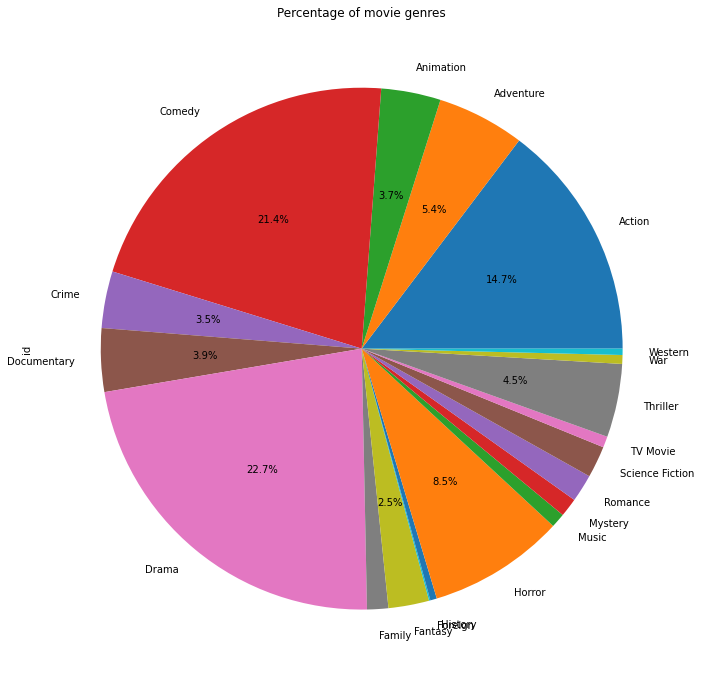

In [94]:
#it shows that the action and Comedy and drama have the highest number

#now plot the above lines into a pie chart
df_g1.plot(kind='pie',figsize=(12,12), autopct=lambda x:('%1.1f%%' % x) if x>2 else '');

#title
plt.title('Percentage of movie genres')


**A5:** The pie chart shows that Drama, comedy and action have the highst number of movies with drama having the largest percentage of 22.7%.

<a id='conclusions'></a>
## Conclusions

> **note**: The findings of the project are tentative, the result were conducted without the use advance statistics or machine learning methods. Therefore, the result are not Certain or fixed.



### Conclusions

In Conclusions, this project has covered the data analysis process starting from data wrangling to exploratory Data Analysis. In the first part I came up with 5 research Questions then precede to do data Wrangling and cleaning, I removed all null and duplicate values, separated the genres to multiple columns, also I checked for redundancies and I filled the zero values with the mean.

For the analysis part, I started by answering the first research Question "Does the vote count have any effect on receiving high rating?" I decided to take the average_rate and turn it into 4 levels to make the Analysis easier Eventually, I compared the vote_count to the ratings to find out that there is a strong correction between them.

For the second research Question, "When did the movie industry received the highest revenue?" the process was easier, I used groupby to find the relationship between the years and revenue and then plotted the result. the result showed how profitable the movie industry is over the years, movie industry Development is increasingly and therefore the profits also increasing. The graph also showed a large decline between the 80s and the 90s, it may be due to data problems.

For the third research Question, Is Movies production increasing or decreasing over the years" the results of this Question Analysis supports the findings of the previous question, movie production is indeed increasing over the years, which is due the rapid increase in Technology advancement Nowadays.


For the forth research Question, "Are high rating and large budget increase profit?" in this analysis part i focused on three variables (budget, rate, revenue), after grouping and plotting the variables the result showed proportional Relationship between the movie rate and revenue, the higher the ratings the higher the profits.

Finally, For the last research Question, "What genres has the highest number of movies?" I decided to use the first genre column for analysis, the results show that highest number of films usually are action with 1587 movies and Comedy with 2313 movies drama with 2447.



------
------

- Duha Alhoshan 10/2020

